# Calculate the coverage rate for 1d rocker kernel

In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from param import *
from dataloader.dataset import UniformSegmentDataset

sns.set_theme(style="whitegrid")
output_dir = ParamDir().output_dir
datalist = ParamDir().data_path_list

## Plot for the internal and external states

In [2]:
for data_dir in datalist:
    data_name = str(data_dir).split('/')[-1]
    K, num_kernels = 16, 200

    # ---- data prep ----
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    (X_train, y_train) = dataset.load_all_data(ParamData().window_size, K)

    with open(ParamDir().output_dir/data_name/(f"tsc_tuning_k_means_small_scale.pickle"),"rb") as f:
        result_all = pickle.load(f)
    result = [result for result in result_all if ((result["K"]==K) and (result["num_kernels"]==num_kernels))][0]

    # ---- plot ----
    labels = result['estimator'].labels_
    fig, axes = plt.subplots(nrows=2, ncols=2, tight_layout=True, sharex=True, sharey=True)
    axes = axes.ravel()
    for i, label in enumerate(np.unique(labels)):
        y_train = np.array([int(float(i)) for i in y_train])
        y, y_counts = np.unique(y_train[np.where(labels==label)], return_counts=True)
        axes[i].bar(y, y_counts)
        axes[i].set_title(f"label: {label}")
        axes[i].set_ylabel("count")
        axes[i].set_xlabel("position")

    mouse_type = "KO" if "KO" in data_name else "WT"
    plt.suptitle(mouse_type)
    plt.savefig(ParamDir().output_dir/data_name/(f"plot_coverage.png"))
    plt.close(fig)

## Coverage Rate

### K-means

Text(0.5, 0.98, 'coverage rate(K-means)')

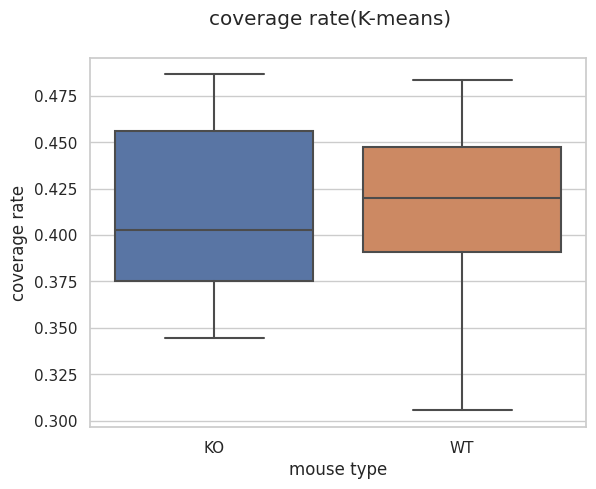

In [3]:
cr_list = []
for data_dir in datalist:
    # ---- data prep ----
    data_name = str(data_dir).split('/')[-1]
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    (X_train, y_train) = dataset.load_all_data(ParamData().window_size, K)

    with open(ParamDir().output_dir/data_name/(f"tsc_tuning_k_means_small_scale.pickle"),"rb") as f:
        result_all = pickle.load(f)
    result = [result for result in result_all if ((result["K"]==K) and (result["num_kernels"]==num_kernels))][0]

    # ---- prediction ----
    labels = result['estimator'].labels_
    adjusted_labels = np.zeros(len(labels))
    y_train = np.array([int(float(i)) for i in y_train])
    for label in np.unique(labels):
        y, y_counts = np.unique(y_train[np.where(labels==label)], return_counts=True)
        predicted_y = y[np.argmax(y_counts)]
        adjusted_labels[np.where(labels==label)] = predicted_y
    coverage_rate = np.sum(adjusted_labels==y_train)/len(y_train)
    if "KO" in data_name:
        cr_list.append([coverage_rate, "KO"])
    else:
        cr_list.append([coverage_rate, "WT"])

# ---- plot ----
df_plot = pd.DataFrame(cr_list, columns=["coverage rate", "mouse type"])
fig, ax = plt.subplots()
sns.boxplot(x="mouse type", y="coverage rate", data=df_plot, ax=ax)
plt.suptitle("coverage rate(K-means)")


### Speactral CLustering

<AxesSubplot:xlabel='mouse type', ylabel='coverage rate'>

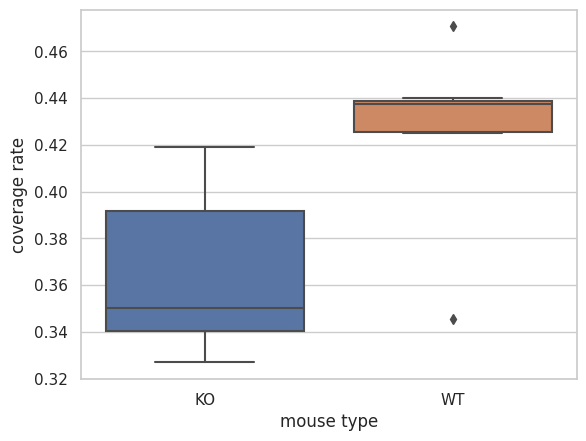

In [4]:
cr_list = []
for data_dir in datalist:
    # ---- data prep ----
    data_name = str(data_dir).split('/')[-1]
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    (X_train, y_train) = dataset.load_all_data(ParamData().window_size, K)

    with open(ParamDir().output_dir/data_name/(f"tsc_tuning_spectral_small_scale.pickle"),"rb") as f:
        result_all = pickle.load(f)
    result = [result for result in result_all if ((result["K"]==K) and (result["num_kernels"]==num_kernels))][0]

    # ---- prediction ----
    labels = result['estimator'].labels_
    adjusted_labels = np.zeros(len(labels))
    y_train = np.array([int(float(i)) for i in y_train])
    for label in np.unique(labels):
        y, y_counts = np.unique(y_train[np.where(labels==label)], return_counts=True)
        predicted_y = y[np.argmax(y_counts)]
        adjusted_labels[np.where(labels==label)] = predicted_y
    coverage_rate = np.sum(adjusted_labels==y_train)/len(y_train)
    if "KO" in data_name:
        cr_list.append([coverage_rate, "KO"])
    else:
        cr_list.append([coverage_rate, "WT"])

# ---- plot ----
df_plot = pd.DataFrame(cr_list, columns=["coverage rate", "mouse type"])
fig, ax = plt.subplots()
sns.boxplot(x="mouse type", y="coverage rate", data=df_plot, ax=ax)
